<a href="https://colab.research.google.com/github/RajshriSuranje/skin-cancer-prediction/blob/main/SMS_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset= pd.read_csv("SMSSpamCollection", sep="\t", names=["label","msg"])

In [3]:
dataset

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.isnull().sum()

,0
label,0
msg,0


In [6]:
dataset['label'] = dataset['label'].map({"ham": 0, "spam": 1})

In [7]:
dataset

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

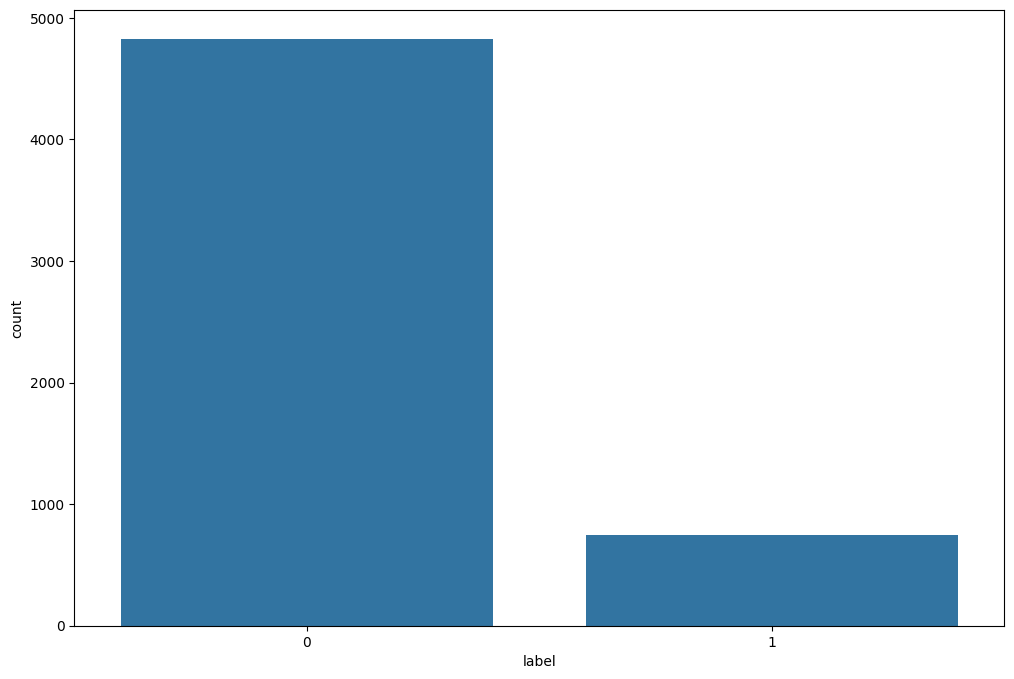

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="label", data = dataset)
plt.show()

In [12]:
only_spam = dataset[dataset["label"] == 1]
len(only_spam), len(dataset) - len(only_spam)

(747, 4825)

In [14]:
count = int((len(dataset) - len(only_spam)) / len(only_spam))
count

6

In [15]:
for _ in range(count - 1):
  dataset = pd.concat([dataset, only_spam])

<ipython-input-17-8fc6b6a0dd09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data = dataset, palette=["#FF00FF","#00FF00"])


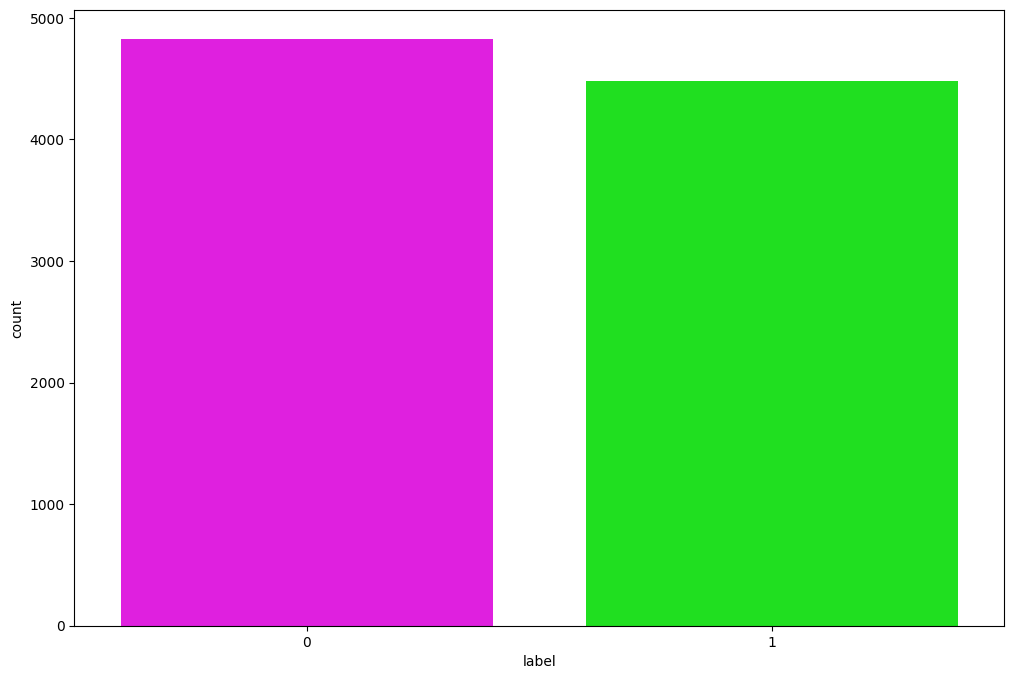

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x="label", data = dataset, palette=["#FF00FF","#00FF00"])
plt.show()

In [20]:
from os.path import split
dataset['word_count'] = dataset['msg'].apply(lambda x: len(x.split()))
dataset

,label,msg,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


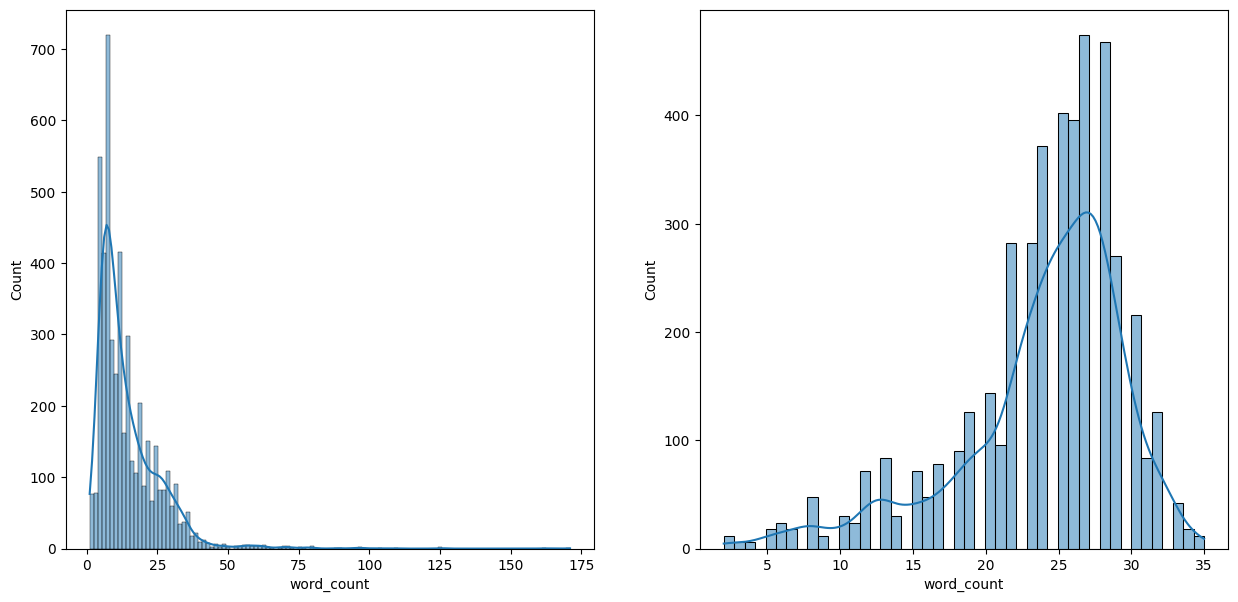

In [21]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(dataset[dataset["label"] == 0].word_count, kde = True)

plt.subplot(1,2,2)
sns.histplot(dataset[dataset["label"] == 1].word_count, kde = True)

plt.show()

In [22]:
def currency(data):
  currency_symbols = ['$','€','£','₹','¥']
  for i in currency_symbols:
    if i in data:
      return 1
  return 0

In [25]:
dataset["contains_currency_symbols"] = dataset['msg'].apply(currency)
dataset

,label,msg,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


<Axes: xlabel='contains_currency_symbols', ylabel='count'>

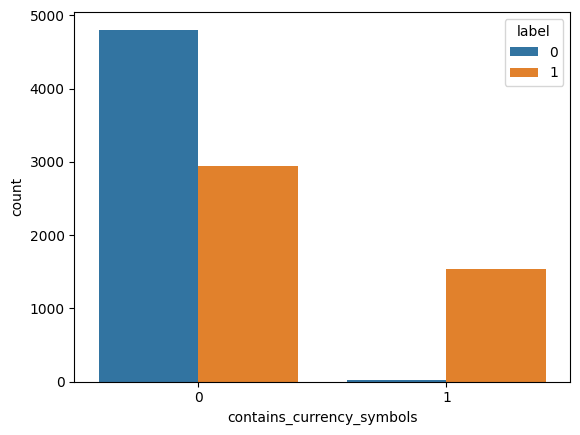

In [26]:
sns.countplot(x="contains_currency_symbols", data = dataset, hue = "label")

In [27]:
def number(data):
  for i in data:
    if ord(i) >= 48 and ord(i) <= 57:
      return 1
    return 0

In [28]:
dataset["contains_numbers"] = dataset['msg'].apply(number)

In [29]:
dataset

,label,msg,word_count,contains_currency_symbols,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,0


<Axes: xlabel='contains_numbers', ylabel='count'>

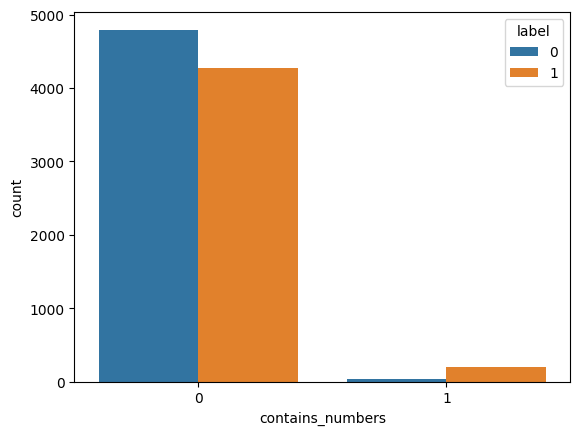

In [30]:
sns.countplot(x="contains_numbers", data = dataset, hue = "label")

In [31]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [36]:
nltk.download('stopwords')
nltk.download('wordnet')


wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [40]:
for sms in list(dataset.msg):
    msg = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)
    msg = msg.lower()
    lemm_words = [wnl.lemmatize(word) for word in msg.split() if word not in stop_words]
    msg = ' '.join(lemm_words)

    corpus.append(msg)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [42]:
feature_names

array(['ac', 'access', 'account', 'address', 'admirer', 'age', 'already',
       'also', 'always', 'amp', 'an', 'another', 'answer', 'anything',
       'anytime', 'apply', 'area', 'around', 'asap', 'ask', 'asked',
       'attempt', 'auction', 'await', 'awaiting', 'award', 'awarded',
       'away', 'babe', 'baby', 'back', 'balance', 'best', 'better', 'bid',
       'big', 'birthday', 'bit', 'biz', 'bluetooth', 'bonus', 'book',
       'bored', 'box', 'boy', 'break', 'bt', 'buy', 'bx', 'call',
       'caller', 'calling', 'camcorder', 'camera', 'cant', 'car', 'care',
       'cash', 'cc', 'cd', 'chance', 'charge', 'charged', 'charity',
       'chat', 'check', 'choose', 'claim', 'class', 'close', 'club', 'co',
       'code', 'collect', 'collection', 'colour', 'com', 'come', 'coming',
       'comp', 'complimentary', 'comuk', 'congrats', 'congratulation',
       'contact', 'content', 'cool', 'cost', 'costa', 'could', 'cr',
       'crazy', 'credit', 'croydon', 'cum', 'currently', 'custcare',
   

In [43]:
X = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
cv.mean(), cv.std()

(np.float64(0.9425980673733594), np.float64(0.004152901086042396))

In [50]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       963
           1       0.95      0.93      0.94       899

    accuracy                           0.95      1862
   macro avg       0.95      0.94      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       963
           1       0.96      1.00      0.98       899

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

